# 데이터 파악

In [2]:
import pandas as pd
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('DB_hit.csv', index_col=False)
df

,idx,code,year,date,result,h_order,position,startup,pa,run,...,sh,sf,avg,obp,slg,ops,pit,avli,re24,wpa
0,0,78168,2018,03-24,W 6:3,1,2B,1,5,0,...,0,0,0.200,0.200,0.200,0.400,24,0.73,-0.78,-0.032
1,1,78168,2018,03-25,L 1:4,1,2B,1,4,0,...,0,0,0.111,0.111,0.111,0.222,13,1.00,-1.27,-0.127
2,2,78168,2018,03-27,W 5:4,3,2B,1,5,2,...,0,0,0.286,0.286,0.357,0.643,21,1.51,0.90,0.118
3,3,78168,2018,03-28,L 3:9,3,2B,1,3,1,...,0,0,0.235,0.278,0.294,0.572,13,1.11,-0.91,-0.073
4,4,78168,2018,03-29,W 9:4,3,2B,1,3,1,...,0,0,0.250,0.348,0.300,0.648,16,0.73,0.79,0.016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99181,99181,65132,2023,06-28,L 6:9,6,C,0,0,0,...,0,0,0.238,0.385,0.310,0.694,0,0.00,0.00,0.000
99182,99182,65132,2023,06-30,D :,8,PH,0,2,0,...,0,0,0.227,0.370,0.295,0.666,8,0.17,-0.72,-0.009
99183,99183,65132,2023,07-01,D :,4,C,0,1,0,...,0,0,0.244,0.382,0.311,0.693,4,0.01,0.22,0.000
99184,99184,65132,2023,07-02,D :,5,DH,1,3,0,...,0,0,0.229,0.362,0.292,0.654,12,1.59,-1.45,-0.119


In [5]:
df.columns

Index(['idx', 'code', 'year', 'date', 'result', 'h_order', 'position',
       'startup', 'pa', 'run', 'hit', 'second', 'third', 'homerun', 'luta',
       'rbi', 'sb_s', 'sb_f', 'bb', 'hbp', 'ibb', 'k', 'dp', 'sh', 'sf', 'avg',
       'obp', 'slg', 'ops', 'pit', 'avli', 're24', 'wpa'],
      dtype='object')

In [6]:
# 6년치(모든 데이터) 각 선수들의 평균 지표 합산

hit_drop = df.drop(['idx', 'year', 'date', 'result', 'h_order', 'position',
       'startup', 'avg', 'obp',	'slg', 'ops'], axis=1)
hit_sum = hit_drop.groupby('code').sum()
hit_sum

,pa,run,hit,second,third,homerun,luta,rbi,sb_s,sb_f,...,hbp,ibb,k,dp,sh,sf,pit,avli,re24,wpa
code,,,,,,,,,,,,,,,,,,,,,
50007,5,1,1,0,0,0,1,0,0,0,...,0,0,4,0,0,0,24,0.41,-1.70,-0.041
50054,111,22,26,4,0,0,30,5,2,1,...,3,0,24,0,0,0,446,67.28,-7.20,-0.159
50066,94,10,21,7,0,2,34,9,0,1,...,0,0,24,4,0,0,396,38.60,-8.83,-1.007
50150,119,25,32,2,2,4,50,20,5,3,...,1,0,23,5,1,1,472,39.47,3.92,-0.109
50165,627,90,168,24,3,48,342,113,2,0,...,7,5,185,9,0,4,2867,167.76,19.61,2.339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79530,58,6,10,2,1,0,14,6,0,0,...,0,0,20,4,2,1,242,17.32,-8.29,-0.805
79608,2428,338,738,150,8,62,1090,395,36,14,...,31,12,279,64,22,33,10315,721.70,71.37,8.549
79705,217,23,51,10,0,7,82,37,3,1,...,4,0,57,7,6,2,992,106.59,-3.12,0.015


In [7]:
# 'avg', 'obp',	'slg', 'ops'

# 타율(avg)
hit_avg = hit_sum['hit'] / hit_sum['pa']
hit_sum['avg'] = round(hit_avg, 3)

# 출루율(obp) / 출루율 = (안타 + 볼넷 + 사구) ÷ (타수 + 볼넷 + 사구 + 희생플라이)
hit_obp = (hit_sum['hit']+ hit_sum['bb'] + hit_sum['hbp'] + hit_sum['ibb']) / (hit_sum['pa'] + hit_sum['bb'] + hit_sum['hbp'] + hit_sum['ibb'] + hit_sum['sf'])
hit_sum['obp'] = round(hit_obp, 3)

# 장타율(slg)
hit_slg = (hit_sum['hit'] + hit_sum['second'] + 2*hit_sum['third'] + 3*hit_sum['homerun']) / hit_sum['pa']
hit_sum['slg'] = round(hit_slg, 3)

# 출루율 + 장타율 (ops)
hit_ops = (hit_obp + hit_slg)
hit_sum['ops'] = round(hit_ops, 3)

hit_sum['avli'] = round(hit_sum['avli'], 3) 
hit_sum['re24'] = round(hit_sum['re24'], 3) 
hit_sum['wpa'] = round(hit_sum['wpa'], 3) 
hit_sum

,pa,run,hit,second,third,homerun,luta,rbi,sb_s,sb_f,...,sh,sf,pit,avli,re24,wpa,avg,obp,slg,ops
code,,,,,,,,,,,,,,,,,,,,,
50007,5,1,1,0,0,0,1,0,0,0,...,0,0,24,0.41,-1.70,-0.041,0.200,0.200,0.200,0.400
50054,111,22,26,4,0,0,30,5,2,1,...,0,0,446,67.28,-7.20,-0.159,0.234,0.315,0.270,0.585
50066,94,10,21,7,0,2,34,9,0,1,...,0,0,396,38.60,-8.83,-1.007,0.223,0.263,0.362,0.624
50150,119,25,32,2,2,4,50,20,5,3,...,1,1,472,39.47,3.92,-0.109,0.269,0.318,0.420,0.738
50165,627,90,168,24,3,48,342,113,2,0,...,0,4,2867,167.76,19.61,2.339,0.268,0.355,0.545,0.901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79530,58,6,10,2,1,0,14,6,0,0,...,2,1,242,17.32,-8.29,-0.805,0.172,0.210,0.241,0.451
79608,2428,338,738,150,8,62,1090,395,36,14,...,22,33,10315,721.70,71.37,8.549,0.304,0.372,0.449,0.821
79705,217,23,51,10,0,7,82,37,3,1,...,6,2,992,106.59,-3.12,0.015,0.235,0.323,0.378,0.700


In [8]:
hit_sum.columns

Index(['pa', 'run', 'hit', 'second', 'third', 'homerun', 'luta', 'rbi', 'sb_s',
       'sb_f', 'bb', 'hbp', 'ibb', 'k', 'dp', 'sh', 'sf', 'pit', 'avli',
       're24', 'wpa', 'avg', 'obp', 'slg', 'ops'],
      dtype='object')

In [9]:
# 타자의 6개 지표 데이터프레임으로 추출

df_hit = hit_sum.drop(['pa', 'run', 'hit', 'second', 'third', 'homerun', 'luta', 'rbi', 'sb_s',
       'sb_f', 'bb', 'hbp', 'ibb', 'k', 'dp', 'sh', 'sf', 'pit', 'avli'], axis=1)
df_hit

,re24,wpa,avg,obp,slg,ops
code,,,,,,
50007,-1.70,-0.041,0.200,0.200,0.200,0.400
50054,-7.20,-0.159,0.234,0.315,0.270,0.585
50066,-8.83,-1.007,0.223,0.263,0.362,0.624
50150,3.92,-0.109,0.269,0.318,0.420,0.738
50165,19.61,2.339,0.268,0.355,0.545,0.901
...,...,...,...,...,...,...
79530,-8.29,-0.805,0.172,0.210,0.241,0.451
79608,71.37,8.549,0.304,0.372,0.449,0.821
79705,-3.12,0.015,0.235,0.323,0.378,0.700


In [10]:
df_hit.query('code==79705')

,re24,wpa,avg,obp,slg,ops
code,,,,,,
79705,-3.12,0.015,0.235,0.323,0.378,0.7


### 그래프를 그리기 위해 스케일링

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_hit), columns=df_hit.columns, index=df_hit.index)*10
df_scaled.reset_index(inplace=True)
df_scaled

,code,re24,wpa,avg,obp,slg,ops
0,50007,2.683527,2.052276,2.998501,2.998501,2.666667,2.822865
1,50054,2.500748,2.011425,3.508246,4.722639,3.600000,4.128440
2,50066,2.446579,1.717847,3.343328,3.943028,4.826667,4.403670
3,50150,2.870293,2.028735,4.032984,4.767616,5.600000,5.208186
4,50165,3.391712,2.876233,4.017991,5.322339,7.266667,6.358504
...,...,...,...,...,...,...,...
501,79530,2.464524,1.787779,2.578711,3.148426,3.213333,3.182781
502,79608,5.111827,5.026138,4.557721,5.577211,5.986667,5.793931
503,79705,2.636336,2.071663,3.523238,4.842579,5.040000,4.940014
504,99606,2.683527,1.951878,4.392804,5.502249,5.573333,5.546930


### 통산기록(6년치)육각형 그래프 그리기

In [37]:
import plotly.graph_objects as go
import plotly.express as px
import math

def plot_hex_chart(df_scaled, code):
    df_player = df_scaled[df_scaled['code'] == code]
    fig = px.line_polar(df_player, r = list(df_scaled[df_scaled['code'] == code][df_scaled.columns.difference(['code'])].iloc[0]),
                       theta = ['re24', 'wpa', 'avg', 'obp', 'slg', 'ops'], line_close=True, color_discrete_sequence=px.colors.sequential.Plasma_r,
                       template='plotly_dark')
    fig.update_traces(fill='toself')
    fig.show()

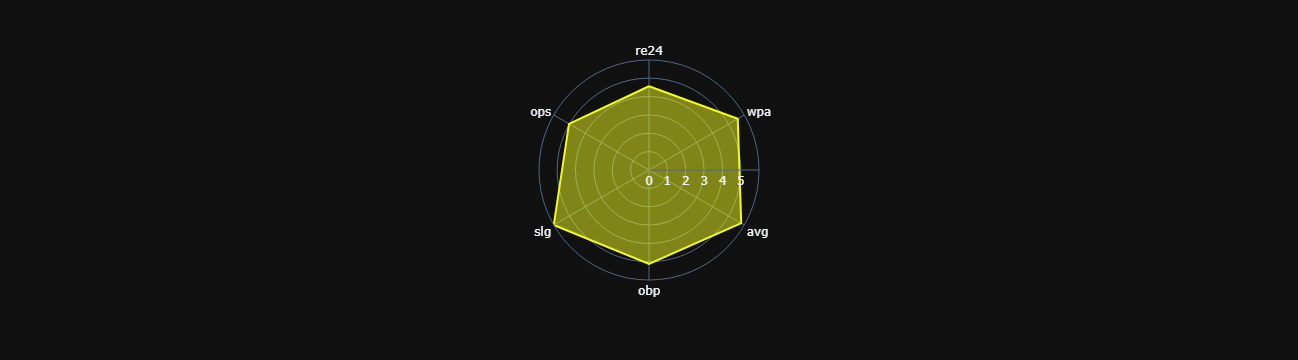

In [42]:
plot_hex_chart(df_scaled, 79608)

### 시즌 별 기록 육각형 그래프 그리기 (2018)

In [59]:
# 2018년 선수별 데이터 뽑아내기

hit_2018 = df[df['year'] == 2018]
hit_2018

,idx,code,year,date,result,h_order,position,startup,pa,run,...,sh,sf,avg,obp,slg,ops,pit,avli,re24,wpa
0,0,78168,2018,03-24,W 6:3,1,2B,1,5,0,...,0,0,0.200,0.200,0.200,0.400,24,0.73,-0.78,-0.032
1,1,78168,2018,03-25,L 1:4,1,2B,1,4,0,...,0,0,0.111,0.111,0.111,0.222,13,1.00,-1.27,-0.127
2,2,78168,2018,03-27,W 5:4,3,2B,1,5,2,...,0,0,0.286,0.286,0.357,0.643,21,1.51,0.90,0.118
3,3,78168,2018,03-28,L 3:9,3,2B,1,3,1,...,0,0,0.235,0.278,0.294,0.572,13,1.11,-0.91,-0.073
4,4,78168,2018,03-29,W 9:4,3,2B,1,3,1,...,0,0,0.250,0.348,0.300,0.648,16,0.73,0.79,0.016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18019,18019,65586,2018,10-10,L 0:7,7,2B,1,3,0,...,0,0,0.365,0.459,0.635,1.094,17,0.57,-0.70,-0.043
18020,18020,65586,2018,10-11,W 4:0,7,3B,1,4,0,...,0,0,0.339,0.431,0.589,1.020,16,0.47,0.05,0.012
18021,18021,65586,2018,10-12,L 4:6,7,3B,1,4,1,...,0,0,0.367,0.449,0.617,1.066,18,1.05,1.30,0.154
18022,18022,65586,2018,10-13,W 5:1,3,SS,1,3,0,...,0,1,0.365,0.438,0.603,1.042,17,0.93,-0.44,-0.020


In [60]:
# 2018시즌 선수들의 지표 합산

hit_drop_2018 = hit_2018.drop(['idx', 'year', 'date', 'result', 'h_order', 'position',
       'startup', 'avg', 'obp',	'slg', 'ops'], axis=1)
hit_sum_2018 = hit_drop_2018.groupby('code').sum()
hit_sum_2018

,pa,run,hit,second,third,homerun,luta,rbi,sb_s,sb_f,...,hbp,ibb,k,dp,sh,sf,pit,avli,re24,wpa
code,,,,,,,,,,,,,,,,,,,,,
60184,10,1,2,1,0,0,3,0,0,0,...,0,0,3,0,0,0,32,4.93,-1.45,0.025
60343,162,19,35,4,0,8,63,24,0,3,...,3,0,49,3,1,0,660,64.14,-6.68,-0.693
60456,6,1,3,0,0,0,3,2,0,0,...,0,0,0,0,0,0,39,2.98,3.52,0.176
60523,174,33,53,10,1,7,86,26,4,2,...,1,1,39,4,0,3,800,85.19,3.65,-0.308
60558,342,55,87,17,2,12,144,39,13,8,...,4,0,92,7,3,1,1403,118.78,-7.96,-0.028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79530,14,5,4,0,1,0,6,1,0,0,...,0,0,5,1,0,0,57,2.81,-0.24,-0.046
79608,498,88,170,38,1,23,279,118,5,1,...,10,1,57,13,0,9,1897,143.14,44.85,4.044
79705,95,15,24,5,0,4,41,18,1,0,...,3,0,27,4,3,0,427,35.87,4.00,0.074


In [61]:
# 2018 시즌 'avg', 'obp',	'slg', 'ops' 계산하기

# 타율(avg)
hit_avg = hit_sum_2018['hit'] / hit_sum_2018['pa']
hit_sum_2018['avg'] = round(hit_avg, 3)

# 출루율(obp) / 출루율 = (안타 + 볼넷 + 사구) ÷ (타수 + 볼넷 + 사구 + 희생플라이)
hit_obp = (hit_sum_2018['hit']+ hit_sum_2018['bb'] + hit_sum_2018['hbp'] + hit_sum_2018['ibb']) / (hit_sum_2018['pa'] + hit_sum_2018['bb'] + hit_sum_2018['hbp'] + hit_sum_2018['ibb'] + hit_sum_2018['sf'])
hit_sum_2018['obp'] = round(hit_obp, 3)

# 장타율(slg)
hit_slg = (hit_sum_2018['hit'] + hit_sum_2018['second'] + 2*hit_sum_2018['third'] + 3*hit_sum_2018['homerun']) / hit_sum_2018['pa']
hit_sum_2018['slg'] = round(hit_slg, 3)

# 출루율 + 장타율 (ops)
hit_ops = (hit_obp + hit_slg)
hit_sum_2018['ops'] = round(hit_ops, 3)

hit_sum_2018['avli'] = round(hit_sum_2018['avli'], 3) 
hit_sum_2018['re24'] = round(hit_sum_2018['re24'], 3) 
hit_sum_2018['wpa'] = round(hit_sum_2018['wpa'], 3) 
hit_sum_2018

,pa,run,hit,second,third,homerun,luta,rbi,sb_s,sb_f,...,sh,sf,pit,avli,re24,wpa,avg,obp,slg,ops
code,,,,,,,,,,,,,,,,,,,,,
60184,10,1,2,1,0,0,3,0,0,0,...,0,0,32,4.93,-1.45,0.025,0.200,0.200,0.300,0.500
60343,162,19,35,4,0,8,63,24,0,3,...,1,0,660,64.14,-6.68,-0.693,0.216,0.266,0.389,0.655
60456,6,1,3,0,0,0,3,2,0,0,...,0,0,39,2.98,3.52,0.176,0.500,0.625,0.500,1.125
60523,174,33,53,10,1,7,86,26,4,2,...,0,3,800,85.19,3.65,-0.308,0.305,0.364,0.494,0.858
60558,342,55,87,17,2,12,144,39,13,8,...,3,1,1403,118.78,-7.96,-0.028,0.254,0.310,0.421,0.731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79530,14,5,4,0,1,0,6,1,0,0,...,0,0,57,2.81,-0.24,-0.046,0.286,0.333,0.429,0.762
79608,498,88,170,38,1,23,279,118,5,1,...,0,9,1897,143.14,44.85,4.044,0.341,0.392,0.560,0.952
79705,95,15,24,5,0,4,41,18,1,0,...,3,0,427,35.87,4.00,0.074,0.253,0.349,0.432,0.780


In [62]:
# 타자의 6개 지표 데이터프레임으로 추출

df_2018_hit = hit_sum_2018.drop(['pa', 'run', 'hit', 'second', 'third', 'homerun', 'luta', 'rbi', 'sb_s',
       'sb_f', 'bb', 'hbp', 'ibb', 'k', 'dp', 'sh', 'sf', 'pit', 'avli'], axis=1)
df_2018_hit

,re24,wpa,avg,obp,slg,ops
code,,,,,,
60184,-1.45,0.025,0.200,0.200,0.300,0.500
60343,-6.68,-0.693,0.216,0.266,0.389,0.655
60456,3.52,0.176,0.500,0.625,0.500,1.125
60523,3.65,-0.308,0.305,0.364,0.494,0.858
60558,-7.96,-0.028,0.254,0.310,0.421,0.731
...,...,...,...,...,...,...
79530,-0.24,-0.046,0.286,0.333,0.429,0.762
79608,44.85,4.044,0.341,0.392,0.560,0.952
79705,4.00,0.074,0.253,0.349,0.432,0.780


In [64]:
# 시각화위해 scaling

scaler = MinMaxScaler()
hit_scaled_2018 = pd.DataFrame(scaler.fit_transform(df_2018_hit), columns=df_2018_hit.columns, index=df_2018_hit.index)*10
hit_scaled_2018.reset_index(inplace=True)
hit_scaled_2018

,code,re24,wpa,avg,obp,slg,ops
0,60184,2.101784,2.243369,4.00,3.200,4.043127,4.194631
1,60343,1.552991,1.389318,4.32,4.256,5.242588,5.494966
2,60456,2.623295,2.422981,10.00,10.000,6.738544,9.437919
3,60523,2.636936,1.847270,6.10,5.824,6.657682,7.197987
4,60558,1.418678,2.180326,5.08,4.960,5.673854,6.132550
...,...,...,...,...,...,...,...
233,79530,2.228751,2.158915,5.72,5.328,5.781671,6.392617
234,79608,6.960126,7.023909,6.82,6.272,7.547170,7.986577
235,79705,2.673662,2.301653,5.06,5.584,5.822102,6.543624
236,99606,2.075551,1.819912,5.86,5.872,5.633423,6.593960


In [65]:
def hex_2018_chart(hit_scaled_2018, code):
    df_player = hit_scaled_2018[hit_scaled_2018['code'] == code]
    fig = px.line_polar(df_player, r = list(hit_scaled_2018[hit_scaled_2018['code'] == code][hit_scaled_2018.columns.difference(['code'])].iloc[0]),
                       theta = ['re24', 'wpa', 'avg', 'obp', 'slg', 'ops'], line_close=True, color_discrete_sequence=px.colors.sequential.Plasma_r,
                       template='plotly_dark')
    fig.update_traces(fill='toself')
    fig.show()

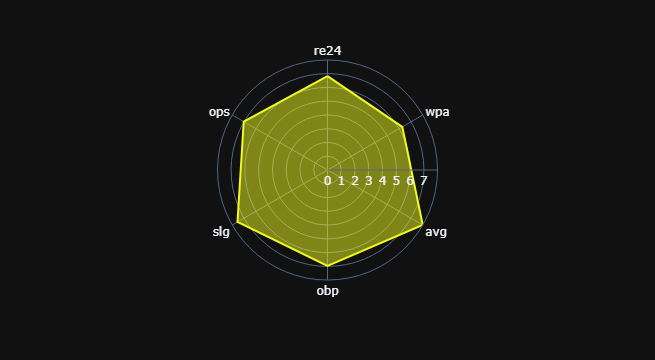

In [66]:
hex_2018_chart(hit_scaled_2018, 79608)

In [5]:
# 투수

df_pit = pd.read_csv('Base_pit.csv')
df_pit

,idx,code,year,date,result,startup,ip,run,er,bf,...,avg,obp,ops,era,avli,re24,wpa,gsc,decision,itv
0,0,65742,2018,03-24,W 6:3,1,6.2,3,2,27,...,0.346,0.36,0.78,2.70,0.84,0.35,0.070,51,W,7+
1,1,65742,2018,03-30,W 10:8,1,6.1,6,6,29,...,0.321,0.33,0.94,8.53,0.76,-1.84,-0.123,38,NaN,6
2,2,65742,2018,04-05,W 4:3,1,7.0,2,2,27,...,0.200,0.21,0.57,2.57,0.93,1.89,0.148,63,NaN,6
3,3,65742,2018,04-11,L 0:12,1,4.1,5,5,24,...,0.421,0.41,0.88,10.38,0.89,-3.88,-0.214,29,L,6
4,4,65742,2018,04-17,L 2:3,1,7.0,2,2,26,...,0.208,0.22,0.47,2.57,1.14,1.89,0.160,62,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13248,13248,53825,2023,06-24,W 13:10,1,5.0,6,6,26,...,0.450,0.45,1.05,10.80,1.56,-3.23,-0.327,22,NaN,6
13249,13249,68419,2023,06-24,L 10:13,1,4.2,6,6,23,...,0.409,0.42,1.10,11.57,0.89,-2.04,-0.049,24,NaN,6
13250,13250,53322,2023,06-25,L 2:17,1,4.0,2,2,19,...,0.312,0.36,0.67,4.50,1.11,0.22,-0.036,43,L,7+
13251,13251,69134,2023,06-20,L 4:8,0,1.0,2,2,7,...,0.600,0.50,1.10,18.00,0.58,-1.45,-0.076,NaN,NaN,3


In [6]:
df_pit.columns

Index(['idx', 'code', 'year', 'date', 'result', 'startup', 'ip', 'run', 'er',
       'bf', 'ab', 'hit', 'second', 'third', 'homerun', 'bb', 'ibb', 'hbp',
       'k', 'pit', 'whip', 'avg', 'obp', 'ops', 'era', 'avli', 're24', 'wpa',
       'gsc', 'decision', 'itv'],
      dtype='object')